In [38]:
import pandas as pd
import zipfile
import kaggle
import os


# Define the paths (use raw string or double backslashes)
zip_file_path = r"C:\Users\Admin\Desktop\EDA Python\archive.zip"  # Update with the correct path
extract_dir = "E-commerce_Clickstream_and_Transaction/"

# Create the extraction directory if it does not exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the ZIP file
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print("ZIP file extracted successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}")
except zipfile.BadZipFile as e:
    print(f"Error: The file is not a ZIP file or it is corrupted: {e}")


ZIP file extracted successfully.


In [39]:
df = pd.read_csv('E-commerce_Clickstream_and_Transaction\ecommerce_clickstream_transactions.csv',na_values="?")

In [40]:
print(df)

       UserID  SessionID                   Timestamp     EventType  ProductID  \
0           1          1  2024-07-07 18:00:26.959902     page_view        NaN   
1           1          1  2024-03-05 22:01:00.072000     page_view        NaN   
2           1          1  2024-03-23 22:08:10.568453  product_view  prod_8199   
3           1          1  2024-03-12 00:32:05.495638   add_to_cart  prod_4112   
4           1          1  2024-02-25 22:43:01.318876   add_to_cart  prod_3354   
...       ...        ...                         ...           ...        ...   
74812    1000         10  2024-05-11 22:48:45.500117      purchase  prod_1238   
74813    1000         10  2024-03-29 04:09:32.514318        logout        NaN   
74814    1000         10  2024-02-09 02:58:56.128697         login        NaN   
74815    1000         10  2024-04-30 16:19:48.002633      purchase  prod_2515   
74816    1000         10  2024-04-01 02:19:29.148727        logout        NaN   

           Amount   Outcome

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74817 entries, 0 to 74816
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserID     74817 non-null  int64  
 1   SessionID  74817 non-null  int64  
 2   Timestamp  74817 non-null  object 
 3   EventType  74817 non-null  object 
 4   ProductID  32113 non-null  object 
 5   Amount     10682 non-null  float64
 6   Outcome    10682 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.0+ MB


In [42]:
df.describe()

,UserID,SessionID,Amount
count,74817.000000,74817.000000,10682.000000
mean,500.740741,5.509777,253.189758
std,288.945183,2.869337,143.043974
min,1.000000,1.000000,5.131843
25%,251.000000,3.000000,130.933965
50%,501.000000,6.000000,253.112517
75%,751.000000,8.000000,378.832078
max,1000.000000,10.000000,499.981538


In [43]:
dtypes = df.dtypes

obj_cols = dtypes[dtypes == 'object'].index
int_cols = dtypes[dtypes == 'int'].index
float_cols = dtypes[dtypes == 'float'].index

print("Objects: ",obj_cols, "\n")
print("Integers: ",int_cols, "\n")
print("Floats: ",float_cols)

Objects:  Index(['Timestamp', 'EventType', 'ProductID', 'Outcome'], dtype='object') 

Integers:  Index(['UserID', 'SessionID'], dtype='object') 

Floats:  Index(['Amount'], dtype='object')


In [44]:
df.isnull().sum()

UserID           0
SessionID        0
Timestamp        0
EventType        0
ProductID    42704
Amount       64135
Outcome      64135
dtype: int64

In [45]:
df.isna().sum()

UserID           0
SessionID        0
Timestamp        0
EventType        0
ProductID    42704
Amount       64135
Outcome      64135
dtype: int64

In [46]:
# Here I will replace all NaN values with empty strings
df = df.apply(lambda x: pd.Series(x.dropna().values))
print(df)

       UserID  SessionID                   Timestamp     EventType  ProductID  \
0           1          1  2024-07-07 18:00:26.959902     page_view  prod_8199   
1           1          1  2024-03-05 22:01:00.072000     page_view  prod_4112   
2           1          1  2024-03-23 22:08:10.568453  product_view  prod_3354   
3           1          1  2024-03-12 00:32:05.495638   add_to_cart  prod_4965   
4           1          1  2024-02-25 22:43:01.318876   add_to_cart  prod_2683   
...       ...        ...                         ...           ...        ...   
74812    1000         10  2024-05-11 22:48:45.500117      purchase        NaN   
74813    1000         10  2024-03-29 04:09:32.514318        logout        NaN   
74814    1000         10  2024-02-09 02:58:56.128697         login        NaN   
74815    1000         10  2024-04-30 16:19:48.002633      purchase        NaN   
74816    1000         10  2024-04-01 02:19:29.148727        logout        NaN   

           Amount   Outcome

In [47]:
# Fill NaN values with empty strings
df = df.fillna('')

print(df) # Here we can see that NaN values are gone

       UserID  SessionID                   Timestamp     EventType  ProductID  \
0           1          1  2024-07-07 18:00:26.959902     page_view  prod_8199   
1           1          1  2024-03-05 22:01:00.072000     page_view  prod_4112   
2           1          1  2024-03-23 22:08:10.568453  product_view  prod_3354   
3           1          1  2024-03-12 00:32:05.495638   add_to_cart  prod_4965   
4           1          1  2024-02-25 22:43:01.318876   add_to_cart  prod_2683   
...       ...        ...                         ...           ...        ...   
74812    1000         10  2024-05-11 22:48:45.500117      purchase              
74813    1000         10  2024-03-29 04:09:32.514318        logout              
74814    1000         10  2024-02-09 02:58:56.128697         login              
74815    1000         10  2024-04-30 16:19:48.002633      purchase              
74816    1000         10  2024-04-01 02:19:29.148727        logout              

           Amount   Outcome

In [48]:
df.isna().sum()

UserID       0
SessionID    0
Timestamp    0
EventType    0
ProductID    0
Amount       0
Outcome      0
dtype: int64

In [49]:
# checking if there are duplicates
df.duplicated().sum()

np.int64(0)

In [50]:
df.to_csv('E-commerce_Clickstream_and_Transaction\modified_cleaned_data.csv', index=False)

In [51]:
df = pd.read_csv('E-commerce_Clickstream_and_Transaction\modified_cleaned_data.csv')
print(df)

       UserID  SessionID                   Timestamp     EventType  ProductID  \
0           1          1  2024-07-07 18:00:26.959902     page_view  prod_8199   
1           1          1  2024-03-05 22:01:00.072000     page_view  prod_4112   
2           1          1  2024-03-23 22:08:10.568453  product_view  prod_3354   
3           1          1  2024-03-12 00:32:05.495638   add_to_cart  prod_4965   
4           1          1  2024-02-25 22:43:01.318876   add_to_cart  prod_2683   
...       ...        ...                         ...           ...        ...   
74812    1000         10  2024-05-11 22:48:45.500117      purchase        NaN   
74813    1000         10  2024-03-29 04:09:32.514318        logout        NaN   
74814    1000         10  2024-02-09 02:58:56.128697         login        NaN   
74815    1000         10  2024-04-30 16:19:48.002633      purchase        NaN   
74816    1000         10  2024-04-01 02:19:29.148727        logout        NaN   

           Amount   Outcome

In [52]:
df.isna().sum()

UserID           0
SessionID        0
Timestamp        0
EventType        0
ProductID    42704
Amount       64135
Outcome      64135
dtype: int64

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv('E-commerce_Clickstream_and_Transaction\modified_cleaned_data.csv')

In [55]:
df.head()
df.info()
df.describe()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74817 entries, 0 to 74816
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserID     74817 non-null  int64  
 1   SessionID  74817 non-null  int64  
 2   Timestamp  74817 non-null  object 
 3   EventType  74817 non-null  object 
 4   ProductID  32113 non-null  object 
 5   Amount     10682 non-null  float64
 6   Outcome    10682 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.0+ MB
       UserID  SessionID                   Timestamp     EventType  ProductID  \
0           1          1  2024-07-07 18:00:26.959902     page_view  prod_8199   
1           1          1  2024-03-05 22:01:00.072000     page_view  prod_4112   
2           1          1  2024-03-23 22:08:10.568453  product_view  prod_3354   
3           1          1  2024-03-12 00:32:05.495638   add_to_cart  prod_4965   
4           1          1  2024-02-25 22:43:01.318876   add_to_car

In [56]:
df.head()

,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome
0,1,1,2024-07-07 18:00:26.959902,page_view,prod_8199,72.913619,purchase
1,1,1,2024-03-05 22:01:00.072000,page_view,prod_4112,7.677938,purchase
2,1,1,2024-03-23 22:08:10.568453,product_view,prod_3354,149.270047,purchase
3,1,1,2024-03-12 00:32:05.495638,add_to_cart,prod_4965,359.589136,purchase
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_2683,454.105277,purchase


Data Transformation

In [57]:
df.head()
df.info()
df.describe()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74817 entries, 0 to 74816
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserID     74817 non-null  int64  
 1   SessionID  74817 non-null  int64  
 2   Timestamp  74817 non-null  object 
 3   EventType  74817 non-null  object 
 4   ProductID  32113 non-null  object 
 5   Amount     10682 non-null  float64
 6   Outcome    10682 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.0+ MB
       UserID  SessionID                   Timestamp     EventType  ProductID  \
0           1          1  2024-07-07 18:00:26.959902     page_view  prod_8199   
1           1          1  2024-03-05 22:01:00.072000     page_view  prod_4112   
2           1          1  2024-03-23 22:08:10.568453  product_view  prod_3354   
3           1          1  2024-03-12 00:32:05.495638   add_to_cart  prod_4965   
4           1          1  2024-02-25 22:43:01.318876   add_to_car

In [58]:
df.describe()

,UserID,SessionID,Amount
count,74817.000000,74817.000000,10682.000000
mean,500.740741,5.509777,253.189758
std,288.945183,2.869337,143.043974
min,1.000000,1.000000,5.131843
25%,251.000000,3.000000,130.933965
50%,501.000000,6.000000,253.112517
75%,751.000000,8.000000,378.832078
max,1000.000000,10.000000,499.981538


In [59]:
print(df.describe())

             UserID     SessionID        Amount
count  74817.000000  74817.000000  10682.000000
mean     500.740741      5.509777    253.189758
std      288.945183      2.869337    143.043974
min        1.000000      1.000000      5.131843
25%      251.000000      3.000000    130.933965
50%      501.000000      6.000000    253.112517
75%      751.000000      8.000000    378.832078
max     1000.000000     10.000000    499.981538


In [60]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74817 entries, 0 to 74816
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserID     74817 non-null  int64  
 1   SessionID  74817 non-null  int64  
 2   Timestamp  74817 non-null  object 
 3   EventType  74817 non-null  object 
 4   ProductID  32113 non-null  object 
 5   Amount     10682 non-null  float64
 6   Outcome    10682 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.0+ MB
None


In [61]:
print(df.head())

   UserID  SessionID                   Timestamp     EventType  ProductID  \
0       1          1  2024-07-07 18:00:26.959902     page_view  prod_8199   
1       1          1  2024-03-05 22:01:00.072000     page_view  prod_4112   
2       1          1  2024-03-23 22:08:10.568453  product_view  prod_3354   
3       1          1  2024-03-12 00:32:05.495638   add_to_cart  prod_4965   
4       1          1  2024-02-25 22:43:01.318876   add_to_cart  prod_2683   

       Amount   Outcome  
0   72.913619  purchase  
1    7.677938  purchase  
2  149.270047  purchase  
3  359.589136  purchase  
4  454.105277  purchase  


In [62]:
print(df.isnull().sum())

UserID           0
SessionID        0
Timestamp        0
EventType        0
ProductID    42704
Amount       64135
Outcome      64135
dtype: int64


In [76]:
df = pd.read_csv('E-commerce_Clickstream_and_Transaction\modified_cleaned_data.csv')
df.describe()

,UserID,SessionID,Amount
count,74817.000000,74817.000000,10682.000000
mean,500.740741,5.509777,253.189758
std,288.945183,2.869337,143.043974
min,1.000000,1.000000,5.131843
25%,251.000000,3.000000,130.933965
50%,501.000000,6.000000,253.112517
75%,751.000000,8.000000,378.832078
max,1000.000000,10.000000,499.981538


ProductID
prod_4714    12
prod_6051    12
prod_8844    11
prod_9806    11
prod_5583    11
prod_1131    11
prod_6092    11
prod_7938    11
prod_8119    11
prod_5253    10
Name: count, dtype: int64


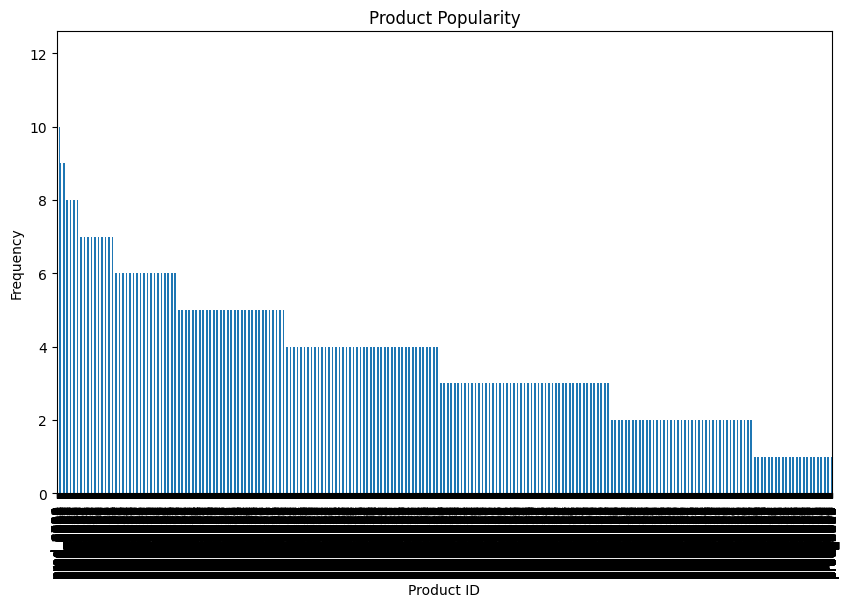

In [79]:
# Count occurrences of product IDs
product_counts = data['ProductID'].value_counts()

# Sort by frequency
popular_products = product_counts.sort_values(ascending=False)

# Print popular products
print(popular_products.head(10))

# Visualize distribution
popular_products.plot(kind='bar', figsize=(10, 6))
plt.title('Product Popularity')
plt.xlabel('Product ID')
plt.ylabel('Frequency')
plt.show()